<a href="https://colab.research.google.com/github/anuragk24/ak24/blob/master/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting SIgmoid


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [ ]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x+b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [ ]:
w = -0.9
b = 5.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

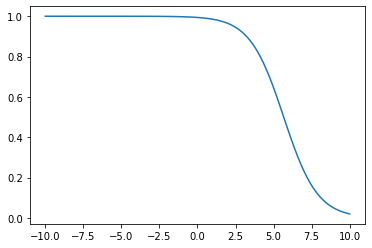

In [ ]:
plt.plot(X, Y)
plt.show()

# class for sigmoid neuron

In [ ]:
class SigmoidNeuron():
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T)+self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self,x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self,x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    #initialise w,b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit='Epoch'):
      dw=0
      db=0

      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

      self.w -= learning_rate*dw
      self.b -= learning_rate*db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.grid()
      plt.ylabel('Mean squared error')
      plt.show()


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
        
    return np.array(Y_pred)
    



#load data and normalisisng


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('mobile_cleaned.csv')

In [ ]:
data.head()
data.shape

(341, 88)

In [ ]:
X = data.drop('Rating', axis=1)
Y = data['Rating'].values

In [ ]:
threshold = 4.1
data['Class'] = (data['Rating']>threshold).astype(np.int)
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_binarized = data['Class'].values

#Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, stratify=Y_binarized)

In [ ]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [ ]:
scaler = StandardScaler()


In [ ]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
minmax_scaler=MinMaxScaler()

In [ ]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [ ]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1, 1)))[0][0]

In [ ]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

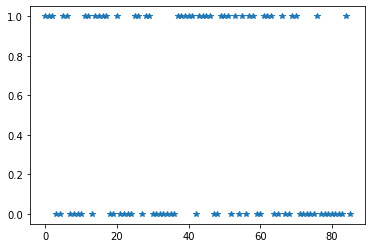

In [ ]:
plt.plot(Y_binarized_test,'*')
plt.show()

In [ ]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


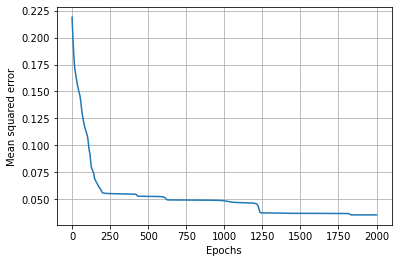

In [ ]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [ ]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype('int').ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarized_train, Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test, Y_binarized_test)
print(accuracy_train, accuracy_test)

0.8196078431372549 0.7906976744186046
